# Introdução

Com a ajuda das bibliotecas _Numpy_, _Pandas_, _Matplotlib_ e _Seaborn_ vamos explorar a base de dados `titatic-data-6.csv` para tirar conclusões a cerca do acidente envolvendo o navio Titanic. Para isso, tentaremos responder as seguintes perguntas na tentativa de encontrar alguns fatores que levaram alguns passageiros a sobreviver ou falecer no naufrágio.

Além disso, iremos utilizar informações retiradas do site [Titanic em foco](http://titanicemfoco.blogspot.com/2011/10/dentro-do-titanic-uma-visao-geral.html) a fim de ter uma visão geral do funcionamento do navio.

## Perguntas

1. De acordo com o site _Titanic em foco_ os passageiros foram alocados em posições diferentes do navio de acordo com o tipo de ticket comprado, primeira classe sendo o mais caro e terceira classe o mais barato. A renda foi um fator importante na sobrevivência dos tripulantes?

2. Apesar de não ser um procedimento oficial é de costume dar prioridade a evacuação de crianças e mulheres, isto ocorreu no Titanic?

3. Em qual local de embarque houve mais sobreviventes?

In [1]:
#Importando bibliotecas
import pandas as pd
import numpy as py

#Importando biblioteca gráfica
import matplotlib.pyplot as plt
import seaborn as sns

#Carregando dados sobre o naufrágio
df_titanic = pd.read_csv('titanic-data-6.csv')

#Mostrando as 5 primeiras linhas dos dados
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Limpeza de dados

Após carregar o banco de dados vamos checar a consistência dos dados, buscar valores nulos e se o tipo de dado é o melhor para aquela informação. A descrição de cada coluna e aplicar as devidas correções:

1. PassengerId (int): ID do passageiro.
2. Survived (int): Indica se o passageiro sobreviveu ou não. 0 = Faleceu / 1 = Sobreviveu
3. Pclass (int): Indica o tipo de ticket. 1 = 1st classe / 2 = 2st classe / 3 = 3st classe
4. Name (string): Nome do passageiro.
5. Sex (string): Gênero do passageiro.
6. Age (float): Idade do passageiro.
7. SibSp (int): Número de irmãos abordo.
8. Parch (int): Número de parentes abordo.
9. Ticket (string): Registro da passagem.
10. Fare (float): Tarifa.
11. Cabin (string): Cabine do passageiro.
12. Embarked (string): Local de embarque do passageiro. S = Southampton / Q = Queenstown / C = Cherbourg

1. Primeiramente, vamos verificar o conteúdo do banco de dados.

In [2]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


2. Checando se o banco de dados possui valores duplicados. No caso, o código retorna 0 o que significa que não a presença dados duplicados.

In [3]:
py.sum(df_titanic.duplicated())

0

3. A coluna __Sex__ é do tipo __object(String)__, para facilitar a manipulação da variável a melhor opção é convertê-la para __int__ 0/1 (Ou boolean).

In [4]:
mapa_genero = {'male': 0,'female': 1}

df_titanic['Sex'] = df_titanic['Sex'].map(mapa_genero)

4. A coluna __Embarked__ é do tipo __object(String)__, pelo mesmo motivo da coluna __Sex__ vamos trocar o tipo de variável para __int__ onde C = 0, Q = 1 e S = 2.

In [5]:
mapa_embarque = {'C': 0,'Q': 1,'S' : 2}

df_titanic['Embarked'] = df_titanic['Embarked'].map(mapa_embarque)

5. Além disso, a mesma coluna têm 2 valores ausentes que deverão ser preenchidos. Para isso, vamos encontrar o local com maior embarque de pessoas e usá-lo para preencher os valores vazios.

In [6]:
df_titanic['Embarked'].value_counts()

df_titanic['Embarked'].fillna(2, inplace = True)

6. Foi encontrado __177 entradas vazias__ na coluna __Age__, para solucionar este problema vamos inserir a média da idade da tripulação nas células nulas.

In [7]:
media = df_titanic['Age'].mean()

df_titanic['Age'].fillna(media, inplace = True)

7. A coluna __Cabin__ possui muitos dados em branco o que inviabiliza uma estimativa, por isso, vamos remover esta coluna. Além da coluna Cabin também vamos remover as colunas __PassengerID__, __Ticket__ e __Name__ por que não serão usadas na análise.

In [8]:
df_titanic.drop(['Cabin','PassengerId','Ticket','Name'], axis = 1, inplace = True)

8. Agora, vamos verificar as mudanças no banco de dados.

In [9]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null float64
dtypes: float64(3), int64(5)
memory usage: 55.7 KB


9. Por fim, vamos dispor as entradas do dataframe para encaminhar a análise dos dados.

In [10]:
df_titanic.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,1.536476
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.791503
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


Pronto, os dados agora estão preparados para a análise. Recapítulando, verificamos que não há dados duplicados, trocamos o tipo de dado da coluna _Sex_ e _Embarked_ de _object(String)_ para _int_, tratamos a falta de 2 entradas vazias na coluna _Embarked_ e 177 entradas vazias na coluna _Age_. Além disso, removemos a coluna _Cabin_ por possuir muitos dados ausentes e as colunas _PassengerId_, _Ticket_ e _Name_ por que não vamos utilizá-las na análise a seguir.

# Análise dos dados

## Renda dos passageiros (Tipo de passagem)
Para encontrar a relação entre a renda da tripulação, expressa pelo valor pago no tipo de passagem dos passageiros e a chance de sobrevivência, cruzamos os dados de tipo de passagem _Pclass_ (1st classe, 2st classe, 3st classe) e a sobrevivência do passageiro _Survived_.

In [11]:
print(df_titanic.groupby('Pclass').Survived.agg(['count', 'sum']))

        count  sum
Pclass            
1         216  136
2         184   87
3         491  119


A coluna __count__ mostra o total de passageiros de cada tipo de ticket, já a coluna __sum__ mostra a quantidade de pessoas que sobreviveram.

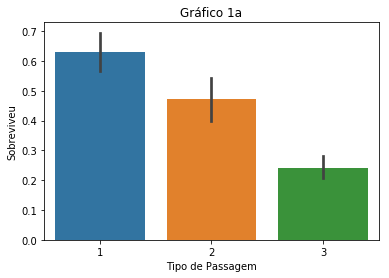

In [12]:
graph_1 = sns.barplot(x='Pclass', y='Survived', data=df_titanic)
graph_1.set_ylabel('Sobreviveu')
graph_1.set_xlabel('Tipo de Passagem')
graph_1.set_title('Gráfico 1a')
plt.show()

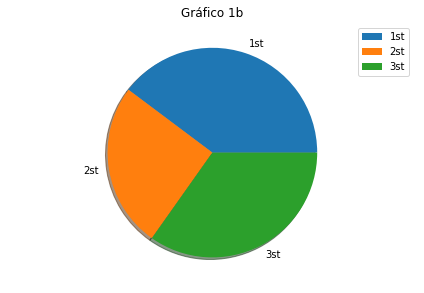

In [13]:
total_pclass = df_titanic.Survived.groupby(df_titanic.Pclass).sum()
legenda_pclass = ['1st', '2st', '3st']
plt.axis('equal')
plt.pie(total_pclass, labels=legenda_pclass, shadow = True)
plt.legend(legenda_pclass, loc='best')
plt.tight_layout()
plt.title('Gráfico 1b')
plt.show()

Pelo __Gráfico 1a__ podemos notar que mais de 60% dos tripulantes de primeira classe conseguiram sobreviver a tragédia. Segundo o site Titanic em foco, os aposentos dos passageiros de terceira classe se encontravam na Popa e na Proa do navio o que dificultou o acesso aos botes salva-vidas que se encontravam no convés perto das suítes de primeira classe. Em termos de quantidade de sobreviventes, o __Gráfico 1b__ mostra que a 1º classe teve o maior número de pessoas que superaram a tragédia, seguido pela 3º e 2º classes.

## Faixa Etária e Gênero
Para traçar a relação entre faixa etária e gênero e encontrar a porcentagem de sobreviventes vamos cruzar os dados das colunas _Sex_, _Survived_ e criar uma nova coluna classificando os passageiros em faixas etárias.

In [14]:
print(df_titanic.groupby('Sex').Survived.agg(['count', 'sum']))

     count  sum
Sex            
0      577  109
1      314  233


Pelo resultado do _groupby_, já é possível ver que do total de 577 homens(0) abordo somente 109 escaparam com vida do naufrágio. Já mais da metade das mulheres(1) conseguiram sobreviver, o que indica uma prioridade no embarque dos botes salva-vidas.

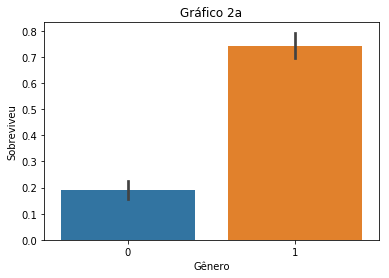

In [15]:
graph_2 = sns.barplot(x='Sex', y='Survived', data=df_titanic)
graph_2.set_ylabel('Sobreviveu')
graph_2.set_xlabel('Gênero')
graph_2.set_title('Gráfico 2a')
plt.show()

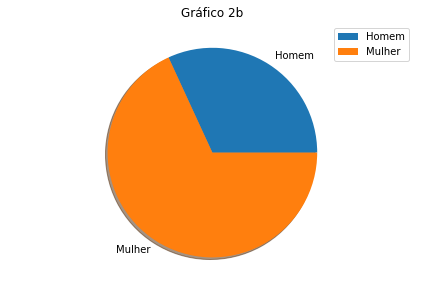

In [16]:
total_genero = df_titanic.Survived.groupby(df_titanic.Sex).sum()
legenda_genero = ['Homem', 'Mulher']
plt.axis('equal')
plt.pie(total_genero, labels=legenda_genero, shadow = True)
plt.legend(legenda_genero, loc='best')
plt.tight_layout()
plt.title('Gráfico 2b')
plt.show()

O __Gráfico 2a__ reforça a conclusão no _groupby_, mulheres foram priorizadas na evacuação do navio. Já o __Gráfico 2b__ mostra de maneira quantitativa a diferença entre o número de sobreviventes em ambos os gêneros.

Para encontrar a relação entre as diversas faixas etárias e a chance de sobrevivência foi preciso criar uma nova coluna chamada _Faixa_ onde a classificação etária definida foi dividida em __criança__ para idade menor ou igual a 12 anos, __adolescente__ entre 12 e 18 anos, __adultos__ até 60 anos e __idosos__ com idade acima dos 60 anos.

In [17]:
def faixa_etaria (data):
    
# Classifica os passageiros de acordo com sua faixa etária.
# Argumentos:
#     data: dataframe
# Retorna:
#     Retorna uma string de acordo com a faixa etária.

    if py.round(data['Age']) <= 12:
        return 'crianca'
    elif py.round(data['Age']) <= 18:
        return 'adolescente'
    elif py.round(data['Age']) <= 60:
        return 'adulto'
    elif py.round(data['Age']) > 60:
        return 'idoso'
    return 'indefinido'

#Cria coluna de faixa etária
df_titanic['Faixa'] = df_titanic.apply(faixa_etaria, axis = 1)

print(df_titanic.groupby('Faixa').Survived.agg(['count', 'sum']))

             count  sum
Faixa                  
adolescente     70   30
adulto         730  267
crianca         69   40
idoso           22    5


O _groupby_ mostra que houve prioridade para o embarque de crianças nos botes já que mais da metade delas sobreviveram. 

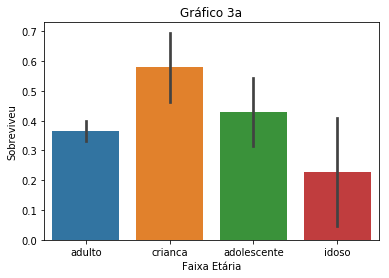

In [18]:
graph_3 = sns.barplot(x='Faixa', y='Survived', data=df_titanic)
graph_3.set_ylabel('Sobreviveu')
graph_3.set_xlabel('Faixa Etária')
graph_3.set_title('Gráfico 3a')
plt.show()

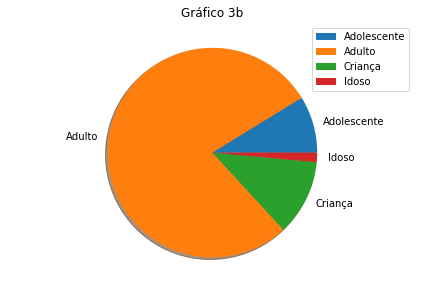

In [19]:
total_faixa = df_titanic.Survived.groupby(df_titanic.Faixa).sum()
legenda_faixa = ['Adolescente', 'Adulto', 'Criança', 'Idoso']
plt.axis('equal')
plt.pie(total_faixa, labels=legenda_faixa, shadow = True)
plt.legend(legenda_faixa, loc='best')
plt.tight_layout()
plt.title('Gráfico 3b')
plt.show()

Pelo __Gráfico 3a__ pode-ser observar que assim como as crianças, os adolescentes também tiveram preferencia nos botes. Já o __Gráfico 3b__ mostra que, em termos quantitativos, grande parte dos sobreviventes são _Adultos_, seguido por _Crianças_, _Adolescentes_ e _Idosos_

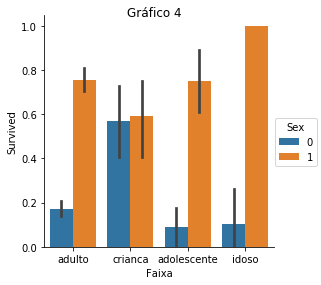

In [20]:
graph_4 = sns.factorplot(x='Faixa', y='Survived', hue='Sex', kind='bar', data=df_titanic)
graph_4.fig.suptitle('Gráfico 4')
plt.show()

Juntando as faixas etárias e os gêneros no __Gráfico 4__ pode-se observar nitidamente que, com exceção das crianças, mulheres tiveram prioridade na evacuação do navio em todas as faixas etárias, e que todas as mulheres idosas no navio conseguiram sobreviver. Não houve distinção de sexo entre as crianças que foram resgatadas.

## Local de Embarque
Para encontrar qual o local em que mais sobreviventes embarcaram traçamos uma relação entre o local de embarque e a chance de sobrevivência cruzado os dados do local de embarque _Embarked_ (S, C, Q) e de passageiros que sobreviveram _Survived_. Mais adiante, também vamos buscar as relações entre a renda da tripulação, o local de embarque e a chance de sobrevida.

In [21]:
print(df_titanic.groupby('Embarked').Survived.agg(['count', 'sum']))

          count  sum
Embarked            
0.0         168   93
1.0          77   30
2.0         646  219


Analisando o _groupby_ podemos notar que maior parte dos sobreviventes embarcaram no porto de __Southampton__ (2).

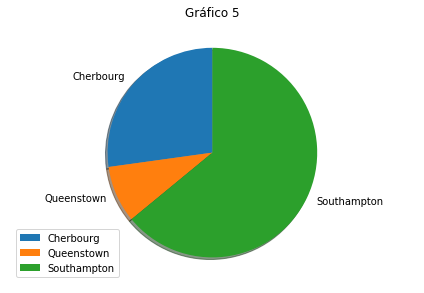

In [22]:
#0 = Cherbourg / 1 = Queenstown / 2 = Southampton
total_embarque = df_titanic.Survived.groupby(df_titanic.Embarked).sum()
legenda_embarque = ['Cherbourg', 'Queenstown', 'Southampton']
plt.axis('equal')
plt.pie(total_embarque, labels=legenda_embarque, shadow = True, startangle=90)
plt.legend(legenda_embarque, loc='best')
plt.tight_layout()
plt.title('Gráfico 5')
plt.show()

Conforme visto no __Gráfico 5__, a maioria dos passageiros sobreviventes embarcou pelo porto de __Southampton__, seguido por __Cherbourg__ e __Queenstown__.

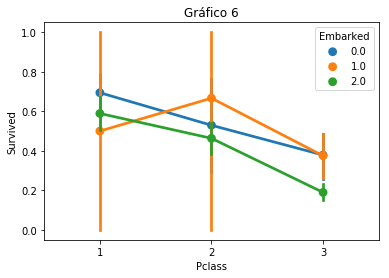

In [23]:
graph_6 = sns.pointplot(x='Pclass', y= 'Survived', hue='Embarked', data=df_titanic)
graph_6.set_title('Gráfico 6')
plt.show()

Juntando as informações do tipo de passagem e local de embarque no __Gráfico 6__, vemos que a maior parte dos sobreviventes da primeira classe embarcou em _Cherbourg_. Já a segunda classe, a maior taxa de sobrevida foi observada em _Queenstown_ e praticamente empatados na terceira classe encontram-se os portos de _Cherbourg_ e _Queenstown_.

# Conclusão

Após a análise dos dados podemos deduzir algumas respostas às nossas perguntas do início do projeto. De acordo com o site _Titanic em foco_, os aposentos dos tripulantes da primeira classe se encontravam perto do convés o que poderia facilitar o acesso aos botes salva-vidas, o __Gráfico 1a__ indica que a maior parte dos viajantes de primeira classe conseguiu sobreviver à tragédia.

Também foi observado nos __Gráficos 2a__, __3a__ e __4__ que a maior parte dos sobreviventes foram mulheres e crianças o que demonstra uma prioridade no resgate destes dois grupos.

Além disso, percebemos no __Gráfico 5__ que a maior parte dos sobreviventes embarcou no porto de _Southampton_ e no __Gráfico 6__, ao correlacionar o tipo de passagem e o local de partida, foi observado que dentre o grupo de pessoas da _1º classe_ as pessoas que embarcaram em _Cherbourg_ tiveram mais chance de viver. Já na _2º classe_, os tripulantes que subiram abordo em _Queenstown_ tiveram maior chance de sobrevida. Por fim, entre os integrantes da _3º classe_ há um empate técnico entre os portos de _Cherbourg_ e _Queenstown_.

## Limitações

O banco de dados, como a coluna _Age_ por exemplo, possui muitos valores em branco o que poderia influênciar a média e desvio padrão da amostra mesmo preenchendo os valores com a média das idades. Já a coluna _Cabin_, a ausência de mais da metade dos dados inviabiliza o seu uso para análise como também um possível preenchimento de valores usando por base alguma estimativa. Talvez, usando __machine learning__ seja possível fazê-lo. Por fim, seria interessante obter mais dados dos passageiros, como a nacionalidade por exemplo, para encontrar mais conclusões a cerca da tragédia do Titanic.

# Referências

Trocar tipo de coluna: https://stackoverflow.com/questions/20093474/python-pandas-replace-number-with-string

Contar ocorrências no Pandas: https://stackoverflow.com/questions/20076195/what-is-the-most-efficient-way-of-counting-occurrences-in-pandas

Tutorial Seaborn: https://www.datacamp.com/community/tutorials/seaborn-python-tutorial#sm

Criando coluna no dataframe: https://stackoverflow.com/questions/27041724/using-conditional-to-generate-new-column-in-pandas-dataframe

Mapa do Titanic: http://titanicemfoco.blogspot.com/2011/10/dentro-do-titanic-uma-visao-geral.html

Groupby: http://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html

Tipos de gráfico: https://seaborn.pydata.org/tutorial/categorical.html

Gráfico de pizza: https://stackoverflow.com/questions/31499033/how-do-i-plot-a-pie-chart-using-pandas-with-this-data

Mais gráfico de pizza: https://pythonspot.com/matplotlib-pie-chart/